In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/london-bike-share-usage-dataset/LondonBikeJourneyAug2023.csv


In [2]:
path = '/kaggle/input/london-bike-share-usage-dataset/LondonBikeJourneyAug2023.csv'
df = pd.read_csv(path)
df.head(3)

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


In [4]:
df.isnull().sum()

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
dtype: int64

In [5]:
df['Start station'].value_counts()

Start station
Hyde Park Corner, Hyde Park                      7437
Black Lion Gate, Kensington Gardens              4439
Waterloo Station 3, Waterloo                     4185
Albert Gate, Hyde Park                           4169
Wormwood Street, Liverpool Street                3899
                                                 ... 
Here East South, Queen Elizabeth Olympic Park     102
Clapham South, Clapham South                       96
Colet Gardens, Hammersmith                         94
Sackville Street, Mayfair                          66
Great Suffolk Street, The Borough                  60
Name: count, Length: 800, dtype: int64

In [6]:
unique_station = len(df['Start station'].unique())
print(f'Total Unique Station: {unique_station}')

Total Unique Station: 800


In [7]:
#total
sum(df['Start station'].value_counts())

776527

In [8]:
#min and max duration

min_dur = min(df['Total duration (ms)'] / 60000)
max_dur = max(df['Total duration (ms)'] / 60000)
print(f'Max Duration {max_dur}\nMin Duration {min_dur}')

Max Duration 124031.79743333334
Min Duration 0.02178333333333333


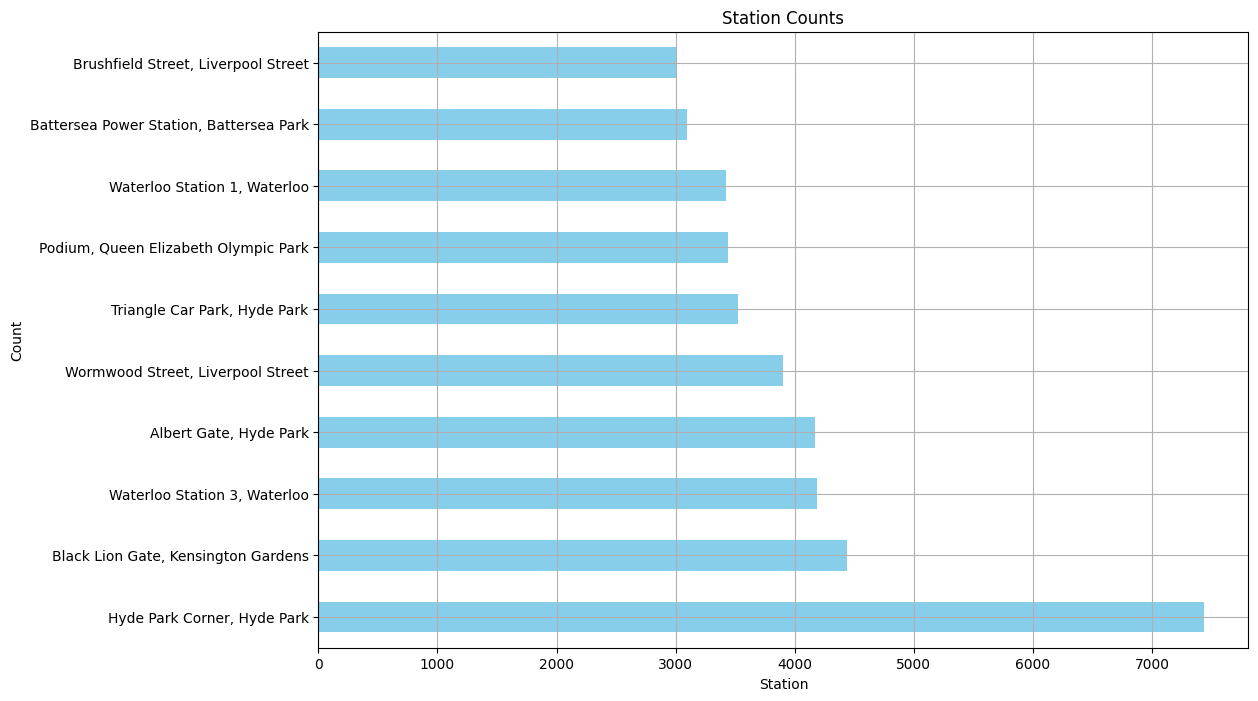

In [9]:

stations = df['Start station'].value_counts().head(10)
plt.figure(figsize=(12, 8))
stations.plot(kind='barh', color='skyblue')

plt.xlabel('Station')
plt.ylabel('Count')
plt.title('Station Counts')
plt.grid(True)

plt.show()

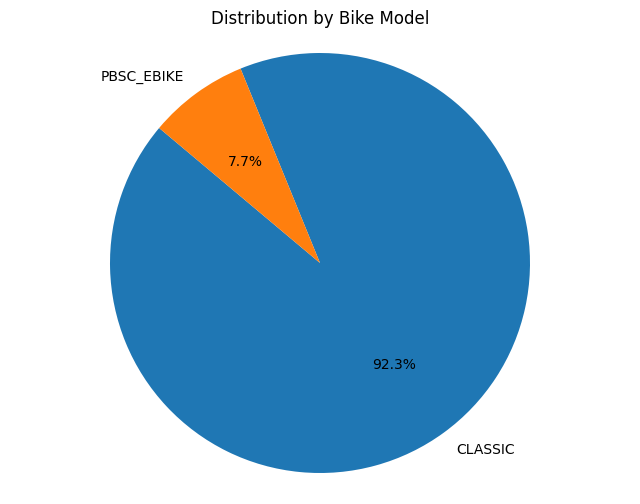

In [10]:
bike = df['Bike model'].value_counts()

plt.figure(figsize=(8, 6))  # Set the size of the figure
plt.pie(bike, labels=bike.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution by Bike Model')
plt.show()